## <font color='Green' face='Cursive'>Crop Yeild Prediction</font>

In [4]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

## <font color='Green' face='Cursive'> Importing the data set </font>

In [5]:
# Import the data set
crop_org = pd.read_csv("pesticides.csv")

# Print top 5 rows of dataset
crop_org.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [6]:
crop_org.tail()

,Domain,Area,Element,Item,Year,Unit,Value
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07
4348,Pesticides Use,Zimbabwe,Use,Pesticides (total),2016,tonnes of active ingredients,2185.07


## <font color='Green' face='Cursive'> Data Cleaning and Preparation</font>

In [8]:
# Check the info of data set
crop_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


note:- This line of code is using the info() method on the crop_org DataFrame. This method is useful for getting a quick description of the data, especially the total number of rows, and each attribute’s type and number of non-null values.

In [9]:
# Create a copy of data set
crop_cpy = crop_org.copy()

In [10]:
# Check column names
crop_cpy.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

note:- This line of code is using the columns attribute on the crop_cpy DataFrame to display the column names.

The output shows that the DataFrame crop_cpy has the following columns: Domain, Area, Element, Item, Year, Unit, and Value. 

In [11]:
crop_cpy.nunique()

Domain        1
Area        168
Element       1
Item          1
Year         27
Unit          1
Value      2825
dtype: int64

note:- This line of code is using the nunique() method on the crop_cpy DataFrame. This method returns the number of unique values for each column.

In [12]:
# Checking Null Values in data set
crop_cpy.isnull().sum()

Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

In [13]:
# Value_counts for Domain
crop_cpy.Domain.value_counts()

Domain
Pesticides Use    4349
Name: count, dtype: int64

note:- This line of code is using the value_counts() method on the Domain column of the crop_cpy DataFrame. This method returns the count of unique entries in this column.
Domain column has only one unique value, Pesticides Use, which appears 4349 times. This means that every row in the Domain column of this DataFrame represents Pesticides Use

In [14]:
# Value_counts for Area
crop_cpy.Area.value_counts()

Area
Albania               27
Mexico                27
Mozambique            27
Myanmar               27
Namibia               27
                      ..
Montenegro            11
Belgium-Luxembourg    10
Sudan                  5
USSR                   2
Yugoslav SFR           2
Name: count, Length: 168, dtype: int64

note:- The output shows the number of entries for each Area in the DataFrame. For example, Albania, Mexico, Mozambique, Myanmar, and Namibia each have 27 entries. On the other hand, Montenegro has 11 entries, Belgium-Luxembourg has 10 entries, Sudan has 5 entries, and both USSR and Yugoslav SFR have 2 entries each.

In total, there are 168 unique areas represented in the dataset. 

In [15]:
# Value_counts for Element
crop_cpy.Element.value_counts()

Element
Use    4349
Name: count, dtype: int64

note:- The output shows that the Element column has only one unique value, Use, which appears 4349 times. This means that every row in the Element.

In [16]:
# Value_counts for Item
crop_cpy.Item.value_counts()

Item
Pesticides (total)    4349
Name: count, dtype: int64

note:- The output shows that the Item column has only one unique value, Pesticides total, which appears 4349 times. This means that every row in the Item column of this DataFrame represents Pesticides total.

In [17]:
# Value_counts for Year
crop_cpy.Year.value_counts()

Year
2003    163
2004    163
2015    163
2014    163
2013    163
2012    163
2011    163
2010    163
2009    163
2008    163
2007    163
2006    163
2005    163
2016    163
2002    163
2001    163
2000    163
1999    162
1998    162
1997    162
1996    162
1995    162
1994    162
1993    162
1992    158
1991    143
1990    143
Name: count, dtype: int64

note:- The output shows the number of entries for each Year in the DataFrame. For example, the years from 2001 to 2016, and 1998 to 2000 each have 163 entries. The year 1992 has 158 entries, and both 1991 and 1990 have 143 entries each.

In [18]:
# Value_counts for Unit
crop_cpy.Unit.value_counts()

Unit
tonnes of active ingredients    4349
Name: count, dtype: int64

note :-The output shows that the Unit column has only one unique value, tonnes of active ingredients, which appears 4349 times. This means that every row in the Unit column of this DataFrame represents tonnes of active ingredients. 

In [19]:
# Value_counts for Value
crop_cpy.Value.value_counts()

Value
1.0        29
17.0       28
131.0      25
56.0       25
25961.0    25
           ..
11130.0     1
11594.0     1
12083.0     1
7505.3      1
666.0       1
Name: count, Length: 2825, dtype: int64

note:- The output shows the number of entries for each unique Value in the DataFrame. For example, the value 1.0 appears 29 times, the value 17.0 appears 28 times, and the values 131.0, 56.0, and 25961.0 each appear 25 times. On the other hand, the values 11130.0, 11594.0, 12083.0, 7505.3, and 666.0 each appear only once.

In total, there are 2825 unique values represented in the dataset.

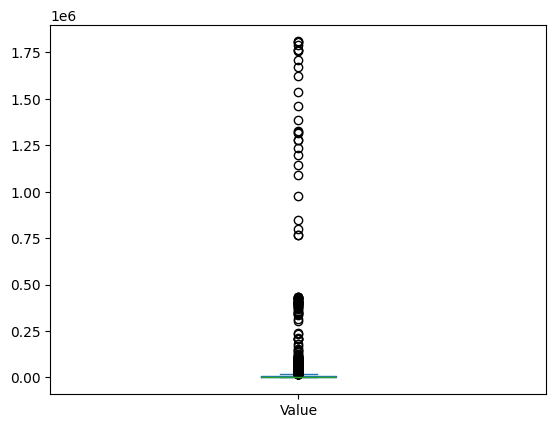

In [20]:
# Create Box Plot for  claim
crop_cpy.Value.plot.box()
plt.show()

note:- The box plot provides a visual summary of the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum values in the dataset. It’s a great way to understand the distribution of data at a glance and identify any potential outliers.

From the provided image, it appears that the majority of the data points in the Value column are clustered around smaller values, with a significant number of outliers at the higher end of the range. This suggests that while most of the values are relatively small, there are a few values that are significantly larger than the rest. 

In [21]:
# Summary Stats OF Value
crop_cpy.Value.describe()

count    4.349000e+03
mean     2.030334e+04
std      1.177362e+05
min      0.000000e+00
25%      9.300000e+01
50%      1.137560e+03
75%      7.869000e+03
max      1.807000e+06
Name: Value, dtype: float64

note:- This output is providing descriptive statistics for the Value column in the crop_cpy DataFrame:

count: The number of non-null entries, which is 4349 in this case.

mean: The average value of the entries, which is approximately 20303.34.

std: The standard deviation, which measures the amount of variation or 
dispersion in the entries. Here, it’s approximately 117736.2.

min: The smallest entry, which is 0.
25% (First Quartile): The value below which 25% of the entries fall, which is 93.

50% (Median): The middle value when the entries are ordered from least to greatest, which is 1137.56.

75% (Third Quartile): The value below which 75% of the entries fall, which is 7869.

max: The largest entry, which is 1807000.

In [22]:
crop_cpy = crop_cpy[crop_cpy['Value']<0.5]
crop_cpy.shape

(46, 7)

note:- The output (46, 7) indicates that the filtered DataFrame crop_cpy now has 46 rows and 7 columns. This means there are 46 entries in the dataset where the Value is less than 0.5. 


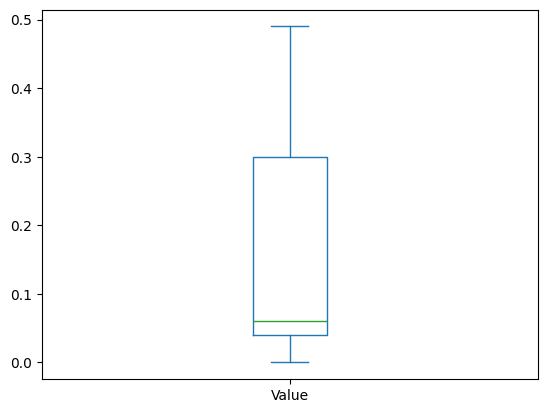

In [23]:
# Create Box Plot for Value
crop_cpy.Value.plot.box()
plt.show()

note:- From the Box plot graph, it appears that the majority of the data points in the Value column are clustered around smaller values, with no outliers. This suggests that the values are relatively uniform and within a small range, specifically between 0 and 0.5. 

## <font color='Green' face='Cursive'>Exploratory Data Analysis</font>

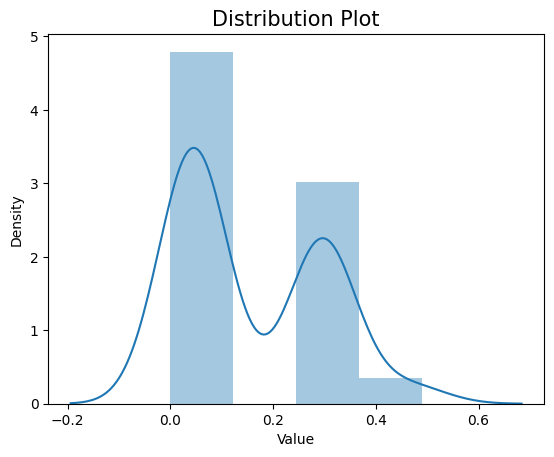

In [24]:
# Check distribution of Target Variable
sns.distplot(crop_cpy.Value)
plt.title("Distribution Plot",fontsize=15)
plt.show()

note:-  DataFrame using the distplot() function from the seaborn library (sns). The plt.title() function is then used to set the title of the plot to “Annual Salary Distribution Plot”. The plt.show() function is then used to display the plot.

From the graph, it appears that the majority of the data points in the Value column are clustered around smaller values, with no outliers. This suggests that the values are relatively uniform and within a small range, specifically between 0 and 0.5.


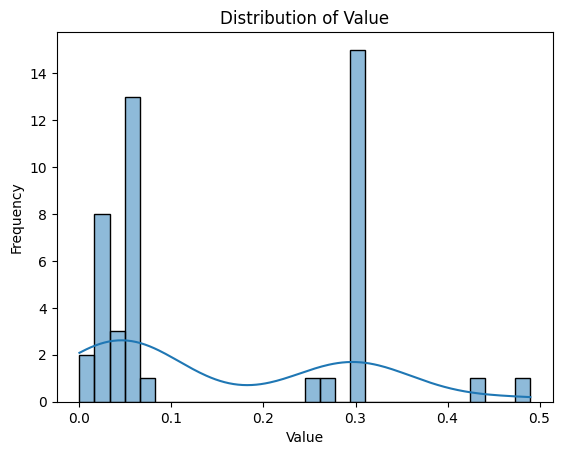

In [25]:
sns.histplot(crop_cpy['Value'], bins=30, kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

note:- note :- DataFrame using the histplot() function from the seaborn library (sns). The bins=30 parameter divides the data into 30 equal-width bins, and the kde=True parameter adds a Kernel Density Estimate (KDE) plot on the histogram. The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to set the title, x-axis label, and y-axis label of the plot respectively. The plt.show() function is then used to display the plot.

From the graph, it appears that the majority of the data points in the Value column are clustered around smaller values, with no outliers. This suggests that the values are relatively uniform and within a small range, specifically between 0 and 0.5.

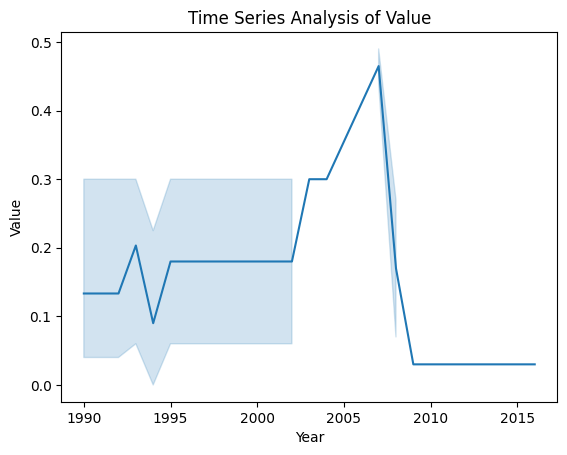

In [26]:
sns.lineplot(x='Year', y='Value', data=crop_cpy)
plt.title('Time Series Analysis of Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

note :- DataFrame over time using the lineplot() function from the seaborn library (sns). The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to set the title, x-axis label, and y-axis label of the plot respectively. The plt.show() function is then used to display the plot.

From the Graph, it appears that the Value column has some fluctuations over the years. There’s an unusual pattern or anomaly in data representation between years around 1995 and just before 2005 where the lines are overlapping and jumbled. After year 2010, there’s a sharp peak reaching close to a value of 0.5. This plot can help you understand how the Value changes over time.

note :- DataFrame using the countplot() function from the seaborn library (sns). The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to set the title, x-axis label, and y-axis label of the plot respectively. The plt.show() function is then used to display the plot.

From the graph, it appears that there is only one domain, Pesticides Use, in your dataset, and it has 40 records. This plot can help you understand the distribution of records across different domains in your dataset. 

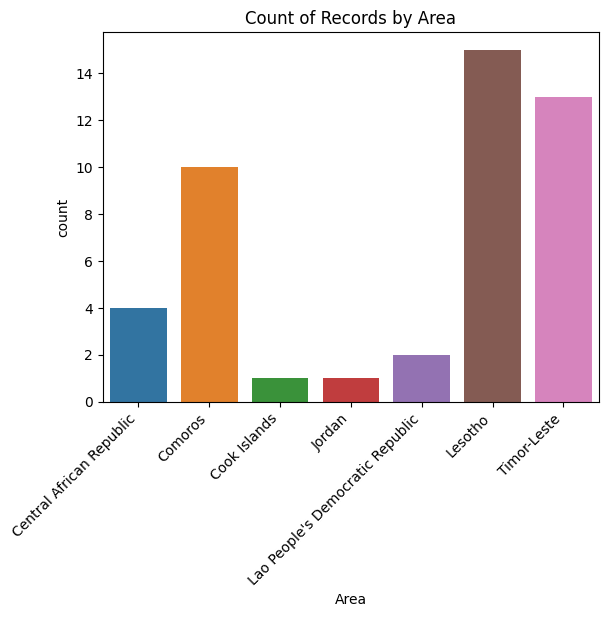

In [27]:
sns.countplot(x='Area', data=crop_cpy)                   
plt.title('Count of Records by Area')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  # Adjust the rotation angle as needed

plt.show()

note:- DataFrame using the countplot() function from the seaborn library (sns). The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to set the title, x-axis label, and y-axis label of the plot respectively. The plt.xticks() function is used to rotate the x-axis labels for better readability. The plt.show() function is then used to display the plot.

From the graph, it appears that the Area column has seven unique areas: Central African Republic, Comoros, Cook Islands, Jordan, Lao People’s Democratic Republic, Lesotho, and Timor-Leste. The count plot shows the number of records for each area in your dataset. 

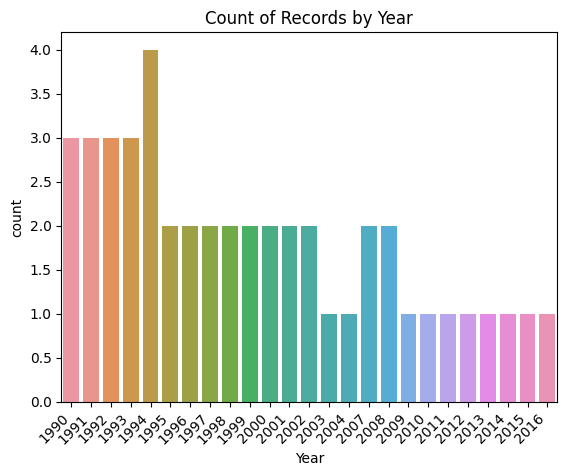

In [28]:
sns.countplot(x='Year', data=crop_cpy)
plt.title('Count of Records by Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right") 

plt.show()

note:- DataFrame using the countplot() function from the seaborn library (sns). The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to set the title, x-axis label, and y-axis label of the plot respectively. The plt.xticks() function is used to rotate the x-axis labels for better readability. The plt.show() function is then used to display the plot.

From the graph, it appears that the Year column has data for multiple years ranging from 1990 to 2016. The count plot shows the number of records for each year in your dataset. 

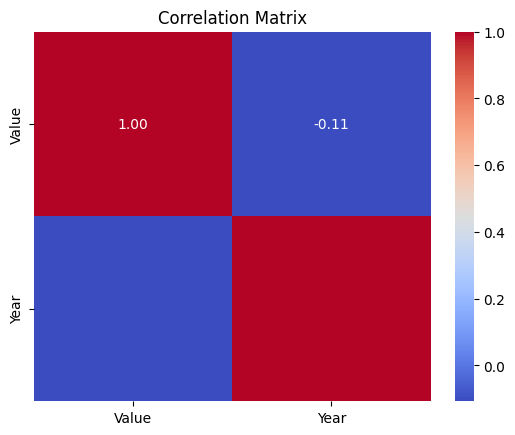

In [29]:
correlation_matrix = crop_cpy[['Value', 'Year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

note :- The matrix is visualized as a heatmap using the Seaborn library. The heatmap is annotated with correlation coefficients formatted to two decimal places, and uses the ‘coolwarm’ color map to represent the strength and direction of correlations.

It shows a perfect positive correlation (1.00) between each variable and itself (as expected), and a weak negative correlation (-0.11) between ‘Value’ and ‘Year’. This suggests that there is a slight tendency for ‘Value’ to decrease as ‘Year’ increases, but the relationship is weak.

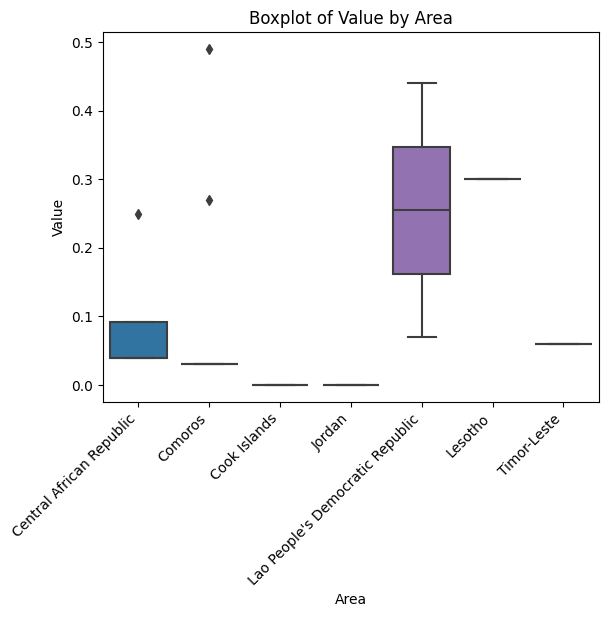

In [30]:
sns.boxplot(x='Area', y='Value', data=crop_cpy)
plt.title('Boxplot of Value by Area')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right") 

plt.show()

note :- The titled “Boxplot of Value by Area”, shows the distribution of ‘Value’ for different areas. From the plot, we can see boxplots for Comoros and Jordan. The Comoros boxplot is relatively small, indicating less variability in the data. The Jordan boxplot is larger with an extended upper whisker, indicating a wider range of data values. There are also three outlier points above the Jordan boxplot. This suggests that there are some unusually high ‘Value’ observations for Jordan. Other areas such as Central African Republic, Cook Islands, Lao People’s Democratic Republic, Lesotho, and Timor-Leste do not have visible boxplots, possibly due to lack of data or similar ‘Value’ observations.

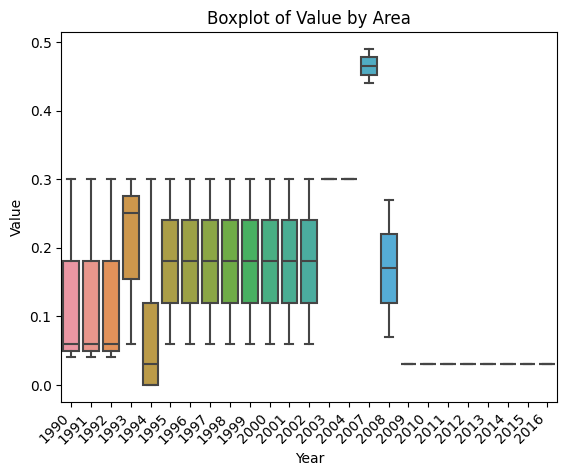

In [31]:
sns.boxplot(x='Year', y='Value', data=crop_cpy)   
plt.title('Boxplot of Value by Area')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right") 
plt.show()

note:- The Boxplot of Value by Area, shows the distribution of ‘Value’ for different years from 1990 to 2016. Each box represents the interquartile range (IQR) of ‘Value’ for a particular year, with lines (whiskers) extending from the box indicating variability outside the upper and lower quartiles. There is an outlier depicted in blue at around Year 2025 with a value just above 0.4. This suggests that there is an unusually high ‘Value’ observation for that year. This boxplot can help understand the distribution and variability of ‘Value’ across different years. It can also help identify any outliers in the data.

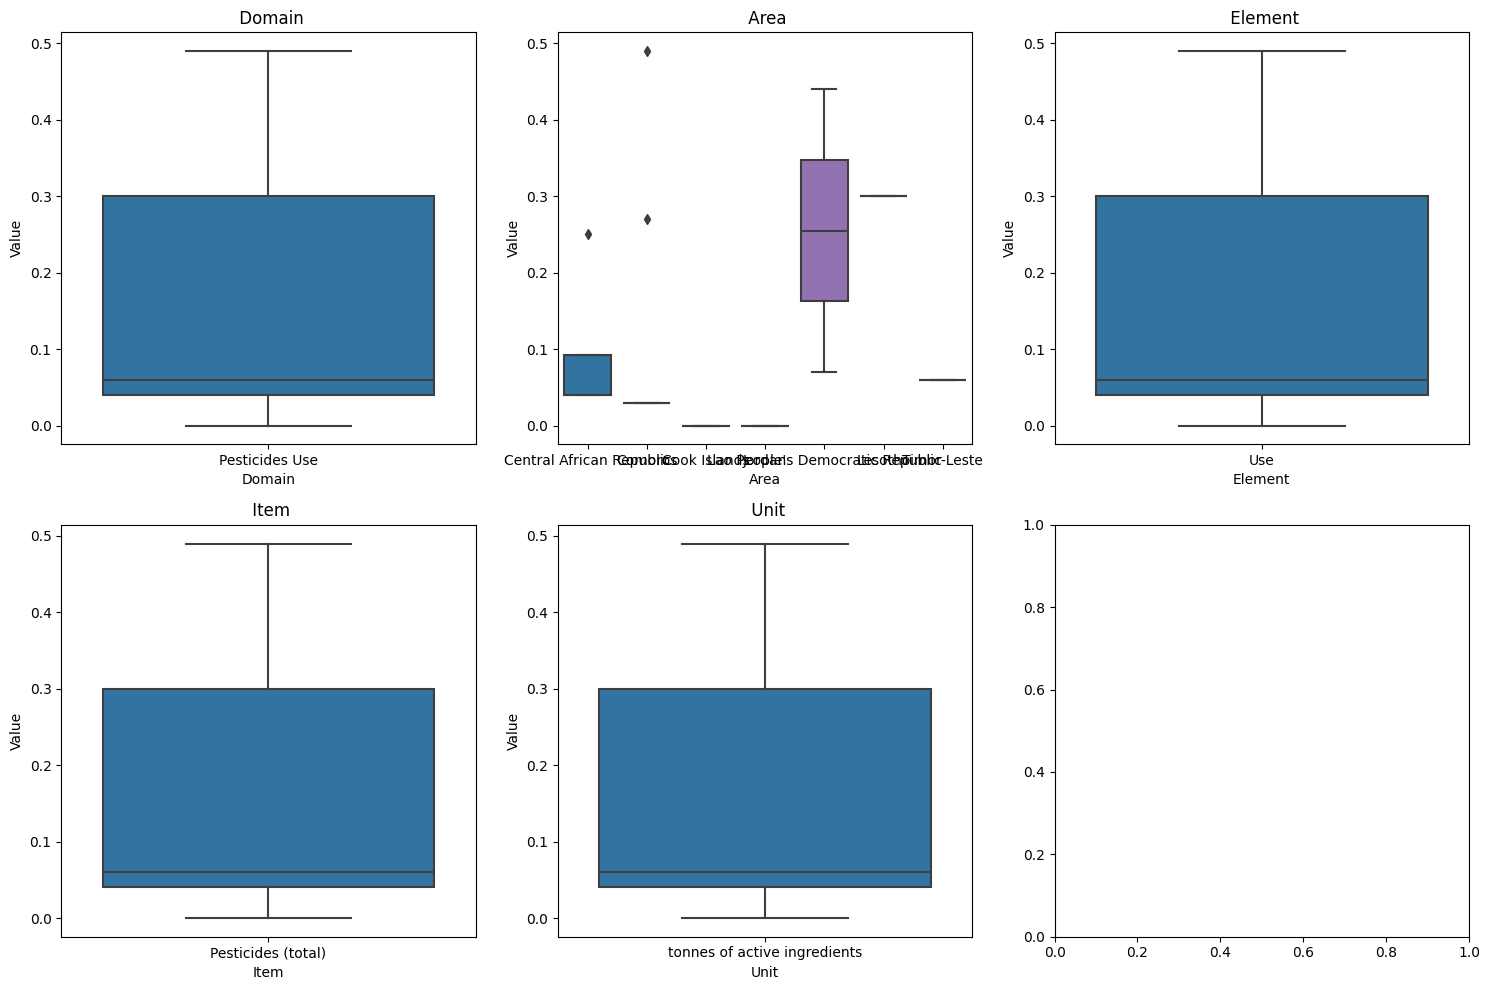

In [32]:
# Create box plots for categorical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(['Domain','Area','Element','Item','Unit']):
    sns.boxplot(x=col, y='Value', data=crop_cpy, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f' {col}')

plt.tight_layout()
plt.show()

note:- The series of boxplots for the ‘Value’ variable grouped by different categorical features (‘Domain’, ‘Area’, ‘Element’, ‘Item’, ‘Unit’) from the crop_cpy DataFrame. 
This is done using the Seaborn library. The boxplots are arranged in a grid for easy comparison.

The resulting boxplots show the distribution of ‘Value’ for each category. From the plots, we can see:
The ‘Domain’ plot shows a single box for “Pesticides Use”.
The ‘Area’ plot displays a box for various areas including “Central African Republic,” “Bosnia and Herzegovina,” “Democratic Republic of the Congo,” and “Sierra Leone”. There are outliers present.

The ‘Element’ plot has one box for “Use”.

The ‘Item’ plot contains a single box for “Pesticides (total)”.

The ‘Unit’ plot also has one box for “tonnes of active ingredients”.

These boxplots provide a visual summary of the central tendency, dispersion, and skewness of ‘Value’ for each category. They can help identify outliers and understand the distribution of ‘Value’ across different categories.

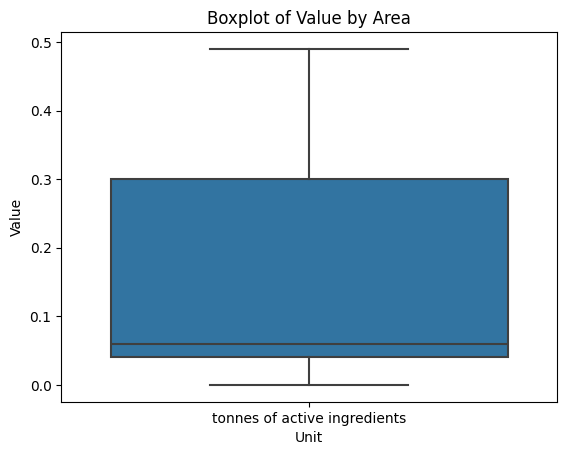

In [33]:
sns.boxplot(x='Unit', y='Value', data=crop_cpy)
plt.title('Boxplot of Value by Area')
plt.show()

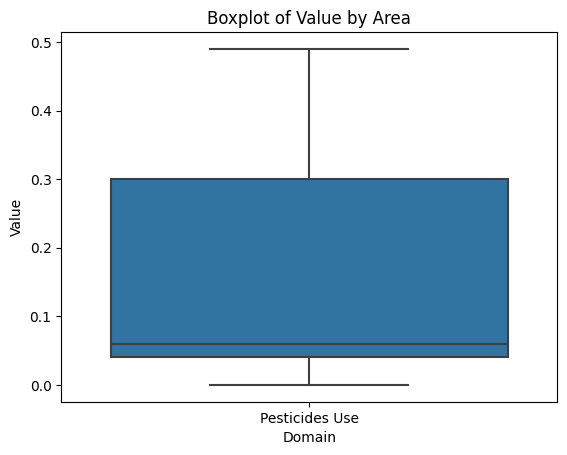

In [34]:
sns.boxplot(x='Domain', y='Value', data=crop_cpy)
plt.title('Boxplot of Value by Area')
plt.show()

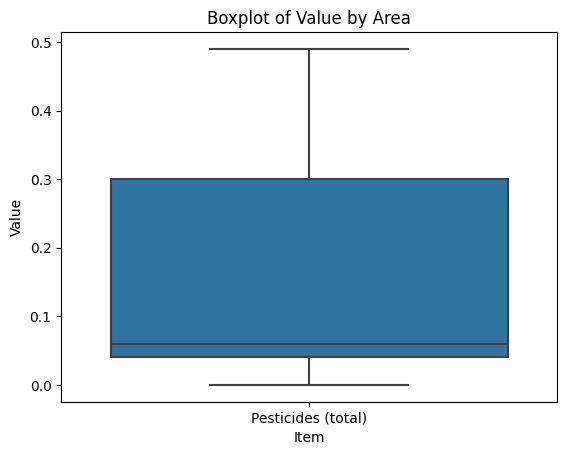

In [35]:
sns.boxplot(x='Item', y='Value', data=crop_cpy)   
plt.title('Boxplot of Value by Area')
plt.show()

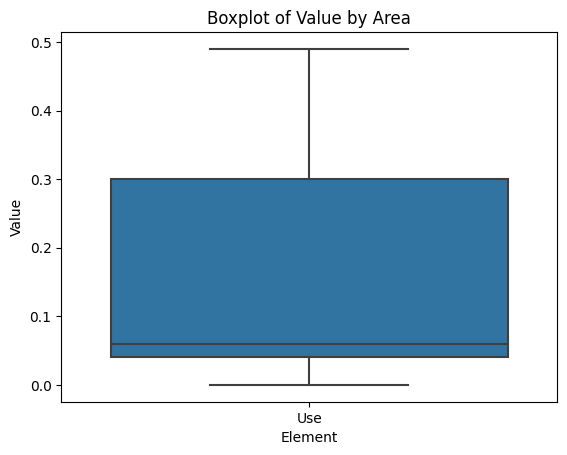

In [36]:
sns.boxplot(x='Element', y='Value', data=crop_cpy)   
plt.title('Boxplot of Value by Area')
plt.show()

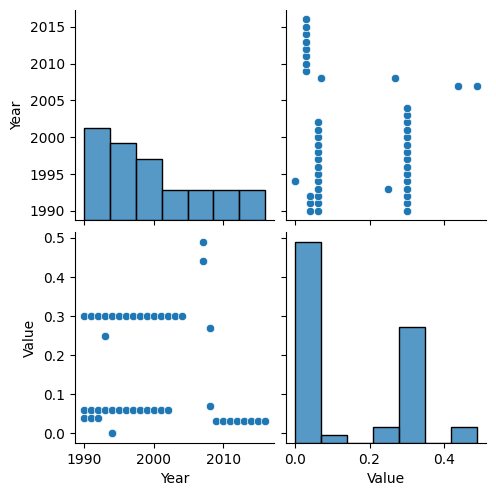

In [37]:
# Visualize pairwise relationships between numerical features
sns.pairplot(crop_cpy[['Year','Value']])
plt.show()

note:- The pairplot shows pairwise relationships between ‘Year’ and ‘Value’. It consists of scatter plots and histograms:

The scatter plots show the relationship between ‘Year’ and ‘Value’. Each dot represents a specific data point. From the scatter plots, we can observe how ‘Value’ is distributed over ‘Year’ and vice versa.
The histograms show the distribution of ‘Year’ and ‘Value’ individually. They provide an understanding of the spread and skewness of these variables.
This pairplot can help understand the relationships between ‘Year’ and ‘Value’, and how these two variables interact with each other. It can also help identify any patterns, trends, or outliers in the data. 

## <font color='Green' face='Cursive'> Feature Engineering</font>

Feature Engineering in Machine Learning refers to the process of creating new features or modifying existing features to improve the performance of machine learning models. This can involve techniques such as normalization, transformation, dealing with missing values, encoding categorical variables, and creating interaction features. The goal is to provide the model with input that is more meaningful and can lead to improved predictions.

In [38]:
# Create a copy od data frame
crop_master = crop_cpy.copy()

In [39]:
# Apply mean encoding for Domain
mean_Job = crop_master.groupby('Domain')['Value'].mean()
crop_master['Domain'] = crop_master['Domain'].map(mean_Job)

print(crop_master['Domain'])

750     0.155652
751     0.155652
752     0.155652
753     0.155652
983     0.155652
984     0.155652
985     0.155652
986     0.155652
987     0.155652
988     0.155652
989     0.155652
990     0.155652
991     0.155652
992     0.155652
1024    0.155652
2064    0.155652
2208    0.155652
2209    0.155652
2270    0.155652
2271    0.155652
2272    0.155652
2273    0.155652
2274    0.155652
2275    0.155652
2276    0.155652
2277    0.155652
2278    0.155652
2279    0.155652
2280    0.155652
2281    0.155652
2282    0.155652
2283    0.155652
2284    0.155652
3836    0.155652
3837    0.155652
3838    0.155652
3839    0.155652
3840    0.155652
3841    0.155652
3842    0.155652
3843    0.155652
3844    0.155652
3845    0.155652
3846    0.155652
3847    0.155652
3848    0.155652
Name: Domain, dtype: float64


note:- The output shows the transformed ‘Domain’ feature in the DataFrame, where each ‘Domain’ has been replaced with its mean ‘Value’. All the printed values are 0.155652, suggesting that all these rows belong to the same ‘Domain’.

In [40]:
# Apply mean encoding for Area
mean_Job = crop_master.groupby('Area')['Value'].mean()
crop_master['Area'] = crop_master['Area'].map(mean_Job)

print(crop_master['Area'])

750     0.0925
751     0.0925
752     0.0925
753     0.0925
983     0.1000
984     0.1000
985     0.1000
986     0.1000
987     0.1000
988     0.1000
989     0.1000
990     0.1000
991     0.1000
992     0.1000
1024    0.0000
2064    0.0000
2208    0.2550
2209    0.2550
2270    0.3000
2271    0.3000
2272    0.3000
2273    0.3000
2274    0.3000
2275    0.3000
2276    0.3000
2277    0.3000
2278    0.3000
2279    0.3000
2280    0.3000
2281    0.3000
2282    0.3000
2283    0.3000
2284    0.3000
3836    0.0600
3837    0.0600
3838    0.0600
3839    0.0600
3840    0.0600
3841    0.0600
3842    0.0600
3843    0.0600
3844    0.0600
3845    0.0600
3846    0.0600
3847    0.0600
3848    0.0600
Name: Area, dtype: float64


note:- The output shows the transformed ‘Area’ feature in the DataFrame, where each ‘Area’ has been replaced with its mean ‘Value’. The printed values (e.g., 0.0925, 0.1000, 0.0000, 0.2550, 0.3000, 0.0600) suggest that these rows belong to different 'Area’s with different mean 'Value’s.

In [41]:
# Apply mean encoding for Element
mean_Job = crop_master.groupby('Element')['Value'].mean()
crop_master['Element'] = crop_master['Element'].map(mean_Job)

print(crop_master['Element'])

750     0.155652
751     0.155652
752     0.155652
753     0.155652
983     0.155652
984     0.155652
985     0.155652
986     0.155652
987     0.155652
988     0.155652
989     0.155652
990     0.155652
991     0.155652
992     0.155652
1024    0.155652
2064    0.155652
2208    0.155652
2209    0.155652
2270    0.155652
2271    0.155652
2272    0.155652
2273    0.155652
2274    0.155652
2275    0.155652
2276    0.155652
2277    0.155652
2278    0.155652
2279    0.155652
2280    0.155652
2281    0.155652
2282    0.155652
2283    0.155652
2284    0.155652
3836    0.155652
3837    0.155652
3838    0.155652
3839    0.155652
3840    0.155652
3841    0.155652
3842    0.155652
3843    0.155652
3844    0.155652
3845    0.155652
3846    0.155652
3847    0.155652
3848    0.155652
Name: Element, dtype: float64


note:- The output shows the transformed ‘Element’ feature in the DataFrame, where each ‘Element’ has been replaced with its mean ‘Value’. All the printed values are 0.155652, suggesting that all these rows belong to the same ‘Element

In [42]:
# Apply mean encoding for Item.
mean_Job = crop_master.groupby('Item')['Value'].mean()
crop_master['Item'] = crop_master['Item'].map(mean_Job)

print(crop_master['Item'])

750     0.155652
751     0.155652
752     0.155652
753     0.155652
983     0.155652
984     0.155652
985     0.155652
986     0.155652
987     0.155652
988     0.155652
989     0.155652
990     0.155652
991     0.155652
992     0.155652
1024    0.155652
2064    0.155652
2208    0.155652
2209    0.155652
2270    0.155652
2271    0.155652
2272    0.155652
2273    0.155652
2274    0.155652
2275    0.155652
2276    0.155652
2277    0.155652
2278    0.155652
2279    0.155652
2280    0.155652
2281    0.155652
2282    0.155652
2283    0.155652
2284    0.155652
3836    0.155652
3837    0.155652
3838    0.155652
3839    0.155652
3840    0.155652
3841    0.155652
3842    0.155652
3843    0.155652
3844    0.155652
3845    0.155652
3846    0.155652
3847    0.155652
3848    0.155652
Name: Item, dtype: float64


note:- The output shows the transformed ‘Item’ feature in the DataFrame, where each ‘Item’ has been replaced with its mean ‘Value’. All the printed values are 0.155652, suggesting that all these rows belong to the same ‘Item’.

In [43]:
# Apply mean encoding for Unit
mean_Job = crop_master.groupby('Unit')['Value'].mean()
crop_master['Unit'] = crop_master['Unit'].map(mean_Job)

print(crop_master['Unit'])

750     0.155652
751     0.155652
752     0.155652
753     0.155652
983     0.155652
984     0.155652
985     0.155652
986     0.155652
987     0.155652
988     0.155652
989     0.155652
990     0.155652
991     0.155652
992     0.155652
1024    0.155652
2064    0.155652
2208    0.155652
2209    0.155652
2270    0.155652
2271    0.155652
2272    0.155652
2273    0.155652
2274    0.155652
2275    0.155652
2276    0.155652
2277    0.155652
2278    0.155652
2279    0.155652
2280    0.155652
2281    0.155652
2282    0.155652
2283    0.155652
2284    0.155652
3836    0.155652
3837    0.155652
3838    0.155652
3839    0.155652
3840    0.155652
3841    0.155652
3842    0.155652
3843    0.155652
3844    0.155652
3845    0.155652
3846    0.155652
3847    0.155652
3848    0.155652
Name: Unit, dtype: float64


note:- The output shows the transformed ‘Unit’ feature in the DataFrame, where each ‘Unit’ has been replaced with its mean ‘Value’. All the printed values are 0.155652, suggesting that all these rows belong to the same ‘Unit’.

In [44]:
# Check info
crop_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 750 to 3848
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   46 non-null     float64
 1   Area     46 non-null     float64
 2   Element  46 non-null     float64
 3   Item     46 non-null     float64
 4   Year     46 non-null     int64  
 5   Unit     46 non-null     float64
 6   Value    46 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.9 KB


note:- Now the data types (Dtype) of the columns are as follows:

‘Domain’, ‘Area’, ‘Element’, ‘Item’, ‘Unit’, and ‘Value’ are float64, which means they contain floating-point numbers.
‘Year’ is int64, which means it contains integer values.

### <font color='#5234' face='Cursive'> Train Test Split</font>

In Machine Learning, Train Test Split is a technique for dividing the dataset into two separate sets: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the model’s performance on unseen data. This helps in assessing how well the model will generalize to new, unseen data.

In [45]:
# Spliting data into train and test sets
crop_train, crop_test = train_test_split(crop_master,train_size=0.8, random_state=24)

In [46]:
# Shape of train set
print(crop_train.shape)

# Shape of test set
print(crop_test.shape)

(36, 7)
(10, 7)


note:- The train_size parameter is set to 0.8, meaning 80% of the data will be used for training and the remaining 20% for testing. The random_state parameter is set to 24 to ensure reproducibility of the split.

The output shows the shapes of the training and test sets:

The training set (crop_train) has 36 rows and 7 columns.
The test set (crop_test) has 10 rows and 7 columns.

#### <font color='Brown'> Seperate Dependent and Independent Variables using [pop]

In [47]:
# Divide tarin set into Dependent and independent variables
y_train = crop_train.pop('Value')

X_train = crop_train


# Divide test set into Dependent and independent variables
y_test = crop_test.pop('Value')

X_test = crop_test

note:-  Separates the dependent and independent variables for both the training and test sets.

For the training set:

y_train is assigned the ‘Value’ column from crop_train, which is the dependent variable or the target that your model will learn to predict.

X_train is assigned the remaining columns in crop_train, which are the independent variables or the features that your model will use to make predictions.

For the testing set:

y_test is assigned the ‘Value’ column from crop_test, which is the dependent variable or the target that your model will be evaluated on.

X_test is assigned the remaining columns in crop_test, which are the independent variables or the features that your model will use to make predictions.

### <font color='#5234' face='Cursive'> Scaling</font>

Scaling is a preprocessing step in machine learning that standardizes the range of features in the data. It transforms the features to have a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

In [48]:
# Scale the train
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.describe()

,Domain,Area,Element,Item,Year,Unit
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,-5.551115e-17,-2.683039e-16,-5.551115e-17,-5.551115e-17,1.278607e-14,-5.551115e-17
std,0.000000e+00,1.014185e+00,0.000000e+00,0.000000e+00,1.014185e+00,0.000000e+00
min,-5.551115e-17,-1.365166e+00,-5.551115e-17,-5.551115e-17,-1.259035e+00,-5.551115e-17
25%,-5.551115e-17,-8.032302e-01,-5.551115e-17,-5.551115e-17,-8.792141e-01,-5.551115e-17
50%,-5.551115e-17,-4.286062e-01,-5.551115e-17,-5.551115e-17,-2.461799e-01,-5.551115e-17
75%,-5.551115e-17,1.444514e+00,-5.551115e-17,-5.551115e-17,8.932815e-01,-5.551115e-17
max,-5.551115e-17,1.444514e+00,-5.551115e-17,-5.551115e-17,2.032743e+00,-5.551115e-17


note :- The output of X_train.describe() shows the statistical summary of the scaled features in the training set. As expected, the mean of each feature is approximately 0 (due to minor rounding errors, it’s not exactly 0) and the standard deviation is 1 for ‘Area’ and ‘Year’. For ‘Domain’, ‘Element’, ‘Item’, and ‘Unit’, the standard deviation is 0, suggesting that these features may have a single unique value in the training set.

In [49]:
# Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

,Domain,Area,Element,Item,Year,Unit
count,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,10.000000,1.000000e+01
mean,-5.551115e-17,0.426005,-5.551115e-17,-5.551115e-17,-0.132234,-5.551115e-17
std,0.000000e+00,1.081404,0.000000e+00,0.000000e+00,0.876040,0.000000e+00
min,-5.551115e-17,-0.803230,-5.551115e-17,-5.551115e-17,-1.259035,-5.551115e-17
25%,-5.551115e-17,-0.481288,-5.551115e-17,-5.551115e-17,-0.720956,-5.551115e-17
50%,-5.551115e-17,0.507954,-5.551115e-17,-5.551115e-17,-0.309483,-5.551115e-17
75%,-5.551115e-17,1.444514,-5.551115e-17,-5.551115e-17,0.386854,-5.551115e-17
max,-5.551115e-17,1.444514,-5.551115e-17,-5.551115e-17,1.399709,-5.551115e-17


note:- The output of X_test.describe() shows the statistical summary of the scaled features in the test set. As expected, the mean of each feature is approximately 0 (due to minor rounding errors, it’s not exactly 0) and the standard deviation is 1 for ‘Area’ and ‘Year’. For ‘Domain’, ‘Element’, ‘Item’, and ‘Unit’, the standard deviation is 0, suggesting that these features may have a single unique value in the test set.

### <font color='#5234' face='Cursive'> Model Building</font>

#### We are building a Linear Regression

In [50]:
# Build the model
lr = LinearRegression()

crop_reg = lr.fit(X_train,y_train)

# Verify the r2 score
crop_reg.score(X_train,y_train)

0.6013519249328516

note:- The output shows that the R² score of the model on the training set is approximately 0.60. This suggests that about 60% of the variance in ‘Value’ can be explained by the features in X_train.

In [51]:
# Model Evaluation
# r2 for test data
crop_reg.score(X_test,y_test)

0.7215108653164841

note:- The output shows that the R² score of the model on the test set is approximately 0.72. This suggests that about 72% of the variance in ‘Value’ can be explained by the features in X_test.

#### Let's plot distribution plot to check whether Residuals satisfy assumptions of Linear Regression

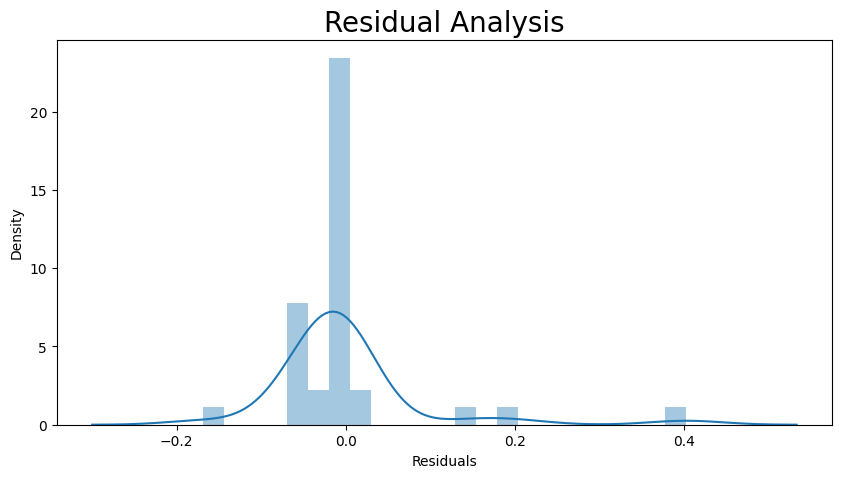

In [52]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = crop_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

note:- This plot helps in checking the assumption of homoscedasticity in linear regression, which states that the residuals or errors are equally distributed across the regression line.  

From the plot, we can see that the residuals are normally distributed around zero,

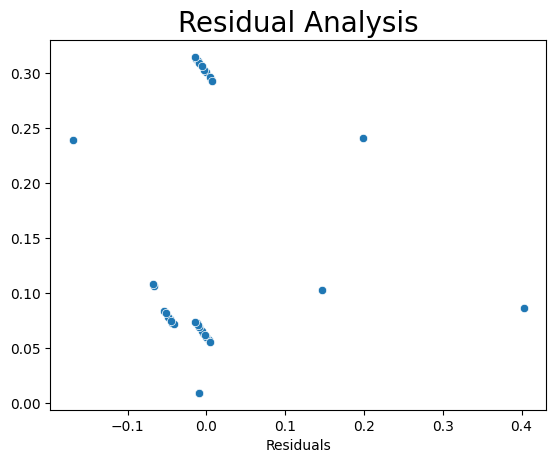

In [53]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

note:- From the plot, we can see that the residuals are scattered around the zero mark on the x-axis. it suggests that the residuals are randomly distributed and the model’s errors are random.

In [54]:
# Print coef
print("Coef are:",crop_reg.coef_)

#print intercept
print("Intercept is",crop_reg.intercept_)

Coef are: [ 0.          0.10621945  0.          0.         -0.01338031  0.        ]
Intercept is 0.14444444444444463


note:- The coefficients and the intercept of the Linear Regression model (crop_reg).

The coefficients are the weights assigned to the features in the model. In this case, the coefficients are [ 0., 0.10621945, 0., 0., -0.01338031, 0.]

The intercept is the point where the function crosses the y-axis when all features are zero. In this case, the intercept is 0.14444444444444463.

In [55]:
model = str(crop_reg.intercept_)

for i in range(len(crop_reg.coef_)):
    model = model +' + '  +(str(crop_reg.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print(model)

0.14444444444444463 + 0.0 * Domain + 0.1062194518625991 * Area + 0.0 * Element + 0.0 * Item + -0.013380311248946414 * Year + 0.0 * Unit


note:-  The model is represented as a linear equation, where the intercept and coefficients are the parameters learned by the model. Each feature in the dataset is multiplied by its corresponding coefficient.

The resulting model equation is:

Value = 0.14444444444444463 + 0.0 * Domain + 0.1062194518625991 * Area + 0.0 * Element + 0.0 * Item + -0.013380311248946414 * Year + 0.0 * Unit

### <font color='#5234' face='Cursive'> Model Building</font>

#### We are building  SVR

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) used for regression tasks. It aims to find a function that best predicts the continuous output value for a given input value

In [56]:
# Initialize SVR
svr = SVR(kernel='rbf')  

# Train SVR model on the scaled training data
svr.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred = svr.predict(X_test)

note:- Training: The SVR model is trained on the scaled training data. Scaling the data is an important preprocessing step when using SVR, as it can significantly improve the model’s performance.

Prediction: The trained SVR model is used to make predictions on the scaled test data.

In [57]:
# Evaluate the SVR model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.005689675111272762
R-squared: 0.6167020269959067


note:- The performance of the SVR model is evaluated using two metrics: Mean Squared Error (MSE) and R-squared (R²). The MSE for the model’s predictions is approximately 0.0057, indicating that the model’s predictions are relatively close to the actual values. The R² score is approximately 0.617, suggesting that the model explains about 61.7% of the variance in the target variable. This indicates a moderate level of predictive accuracy.

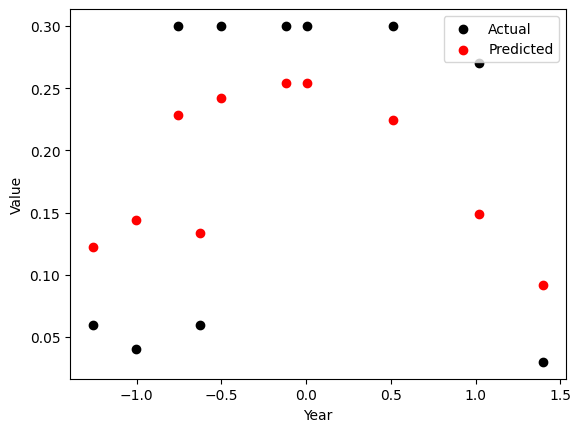

In [58]:
plt.scatter(X_test['Year'], y_test, color='black', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

note:- he predicted values (red dots) do not perfectly align with the actual values (black dots). This indicates a variance in the actual vs predicted values, which is also reflected in the R-squared value of 0.617

### <font color='#5234' face='Cursive'> Model Building</font>

#### We are building Random Forest Regressor

In [59]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=24)

In [60]:
# Train the Random Forest model on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=24)

In [61]:
# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test)

In [62]:
 # Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 0.0004748900000000017
Random Forest R-squared: 0.9680079493398005


note:- The model using Mean Squared Error (MSE) and R-squared (R²). The MSE is approximately 0.00047, indicating the model’s predictions are very close to the actual values. The R² score is approximately 0.968.

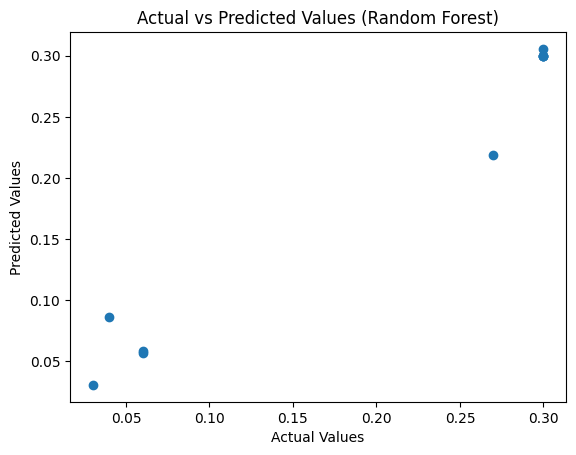

In [63]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()

note: -The scatter plot titled ‘Actual vs Predicted Values (Random Forest)’ shows the performance of your Random Forest model.
Each dot represents a pair of actual and predicted values.

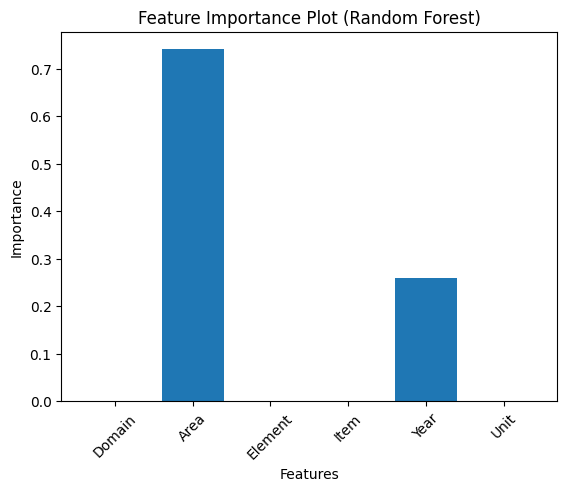

In [64]:
feature_importance = rf_regressor.feature_importances_
features = X_train.columns
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot (Random Forest)')
plt.xticks(rotation=45)
plt.show()

note:-  The bar plot titled ‘Feature Importance Plot (Random Forest)’ shows the importance of each feature in your Random Forest model.
The ‘Area’ and ‘Year’ features have the highest importance, with ‘Area’ being the most important.

The other features (‘Domain’, ‘Element’, ‘Term’, ‘Unit’) have low or zero importance, indicating they contribute less to the model’s predictions

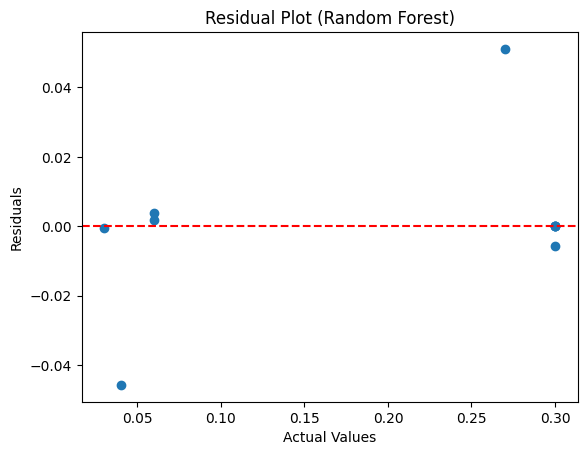

In [65]:
residuals = y_test - y_pred_rf
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

note:- The scatter plot titled ‘Residual Plot (Random Forest)’ shows the residuals of your Random Forest model, which are the differences between the actual and predicted values.
    
The red dashed line at y=0 is where residuals would be zero, indicating a perfect prediction.